# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime, timedelta
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saumyasinha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [27]:
# Define function to fetch the news article 

def news_article(crypto):
    # Fetch articles new articles
    headlines = newsapi.get_everything(
        q= crypto, 
        language="en",
        sort_by="relevancy"
    )
    return headlines

In [28]:
# Fetch the Bitcoin news articles
bitcoin_headlines = news_article("bitcoin")

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 7843


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': "Elon Musk reveals who bitcoin's creator Satoshi Nakamoto might be",
 'description': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency Bitcoin.\xa0"You can watch ideas evolve before Bitcoin was lau…',
 'url': 'https://techncruncher.blogspot.com/2021/12/elon-musk-reveals-who-bitcoins-creator.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEik_48hPzMzsDzwfdUeHj4jNGqYGevEuVjTTPkAGTu9bRN3oePxV6bxF897GK8Az3AaSqUOalYXNG4HSCy0fW5KUHuruCWP8hAfZxgrgbzh-dsbLM9jxyFGCthOZdBCa1dNkqk6mrVl0VtflsV2VvKXfGnwL6-68m-mxp7qHJuLlvqGIahZ9YDe5mt97w=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-12-29T20:41:00Z',
 'content': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expe

In [29]:
# Fetch the Ethereum news articles
ethereum_headlines = news_article("ethereum")

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about ethereum: 3569


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Corin Faife',
 'title': 'Crypto.com admits over $30 million stolen by hackers',
 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2022-01-20T13:23:31Z',
 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}

In [30]:
# Define function for sentiment score DataFrame
def sentiment_analysis(headline):
    
    sentiments = []
    
    for article in headline["articles"]:
        try:
            date = article["publishedAt"][:10]
            text = article["content"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
               
            sentiments.append({
                "date": date,
                "text": text,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
        except AttributeError:
            pass
        # Create DataFrame
        df = pd.DataFrame(sentiments)
    return df

In [31]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = sentiment_analysis(bitcoin_headlines)

# Show sample data
display(bitcoin_df.head())

,date,text,compound,positive,negative,neutral
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871


In [32]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = sentiment_analysis(ethereum_headlines)
# Show sample data
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877


In [33]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.041505,0.058200,0.037900,0.903900
std,0.366363,0.057018,0.043444,0.062064
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.875500
50%,0.038600,0.054000,0.000000,0.917000
75%,0.328950,0.084000,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [34]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.164365,0.053050,0.008700,0.938200
std,0.272452,0.065873,0.021502,0.066563
min,-0.153100,0.000000,0.000000,0.783000
25%,0.000000,0.000000,0.000000,0.894000
50%,0.000000,0.039500,0.000000,0.951000
75%,0.406800,0.090250,0.000000,1.000000
max,0.757900,0.217000,0.067000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin's mean positive score (0.058200) is higher than Ethereum's mean positive score (0.053050)

Q: Which coin had the highest compound score?

A: Ethereum's max compound score (0.757900) is higher than Bitcoin's mean positive score (0.680800)

Q. Which coin had the highest positive score?

A: Ethereum's max positive score (0.21700) is higher than Bitcoin's max positive score (0.185000)

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [36]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(sw)
# Expand the default stopwords list if necessary


{'ma', 'does', 'under', 'can', 'very', "doesn't", 'other', 'this', 'up', "needn't", 'just', 'won', 'which', 'that', 'ours', "wouldn't", 'at', 'her', "aren't", 'where', 'mustn', 'yourself', "shouldn't", 'how', 'your', 'been', 'than', 't', "shan't", 'above', 'by', 'haven', 'because', 'is', 'them', 'yours', "don't", 'or', 'having', 'until', "should've", 'once', 'of', 'to', 'as', 'on', "that'll", 'why', 'mightn', 'don', 'has', 'didn', 'shouldn', "you've", "wasn't", 'not', 'will', 'm', 'y', 'hadn', 'out', 'had', 'only', 'same', 'each', 'for', 'from', "you're", 'theirs', 'i', 'were', 'his', "she's", 's', 'with', 'itself', "couldn't", 'but', 'here', 'him', 'after', 'are', 'no', 'whom', 'those', 'over', 'needn', 'herself', "weren't", 'am', 'there', 'and', 'below', 'myself', 'have', 'should', 'further', 'be', 'we', 'wasn', 'do', 'into', 'did', 'you', 'an', 'before', 'himself', "won't", 'so', 'any', 'll', 've', 'own', 'the', 'wouldn', 'our', 'was', 'she', "haven't", 'aren', 'what', 'about', 'nor

In [37]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    output = [word.lower() for word in lem if word.lower() not in sw]

    return output

In [38]:
# Create a function to get the tokens
def add_token(crypto):
    
    globals()[f"{crypto}_text_token"] ={
        "tokens":[]
    }
    for index, row in bitcoin_df.iterrows():
        globals()[f"{crypto}_text"] = (globals()[f"{crypto}_df"])["text"][index]
        globals()[f"{crypto}_token"]=tokenizer(globals()[f"{crypto}_text"])
        (globals()[f"{crypto}_text_token"])["tokens"].append(globals()[f"{crypto}_token"])
    
    return globals()[f"{crypto}_text_token"]



In [39]:
# Create a new tokens column for Bitcoin

# Create token DataFrame using function add_token
bitcoin_token_df = pd.DataFrame(add_token('bitcoin'))

# Add token column into bitcoin DataFrame

bitcoin_df = bitcoin_df.join(bitcoin_token_df)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-12-29,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,0.3612,0.077,0.000,0.923,"[muskmark, ralstonafp, via, getty, imageselon,..."
1,2022-01-12,When Denis Rusinovich set up cryptocurrency mi...,0.0000,0.000,0.000,1.000,"[denis, rusinovich, set, cryptocurrency, minin..."
2,2022-01-25,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, legal, ten..."
3,2022-01-14,Were officially building an open Bitcoin minin...,-0.4404,0.000,0.083,0.917,"[officially, building, open, bitcoin, mining, ..."
4,2022-01-27,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."


In [40]:
# Create a new tokens column for Ethereum
# Create token DataFrame using function add_token
ethereum_token_df = pd.DataFrame(add_token('ethereum'))

# Add token column into ethereum DataFrame
ethereum_df = ethereum_df.join(ethereum_token_df)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-20,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,2022-01-19,Hackers who made off with roughly $15 million ...,0.0000,0.000,0.000,1.000,"[hackers, made, roughly, million, ethereum, cr..."
2,2022-01-20,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948,"[level, new, mayor, simply, employing, ageold,..."
3,2022-01-21,"Back in September\r\n, Robinhood announced pla...",0.0772,0.038,0.000,0.962,"[back, september, robinhood, announced, plan, ..."
4,2022-01-20,Trading platform Crypto.com lost about $34 mil...,-0.1027,0.056,0.067,0.877,"[trading, platform, cryptocom, lost, million, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [41]:
from collections import Counter
from nltk import ngrams

In [42]:
# Create a function to generate N-grams
def bigram(crypto,n=2):
    
    bigram_counts= {
        "bigrams":[]
    }
    
    for index, row in (globals()[f"{crypto}_df"]).iterrows():
        text = (globals()[f"{crypto}_df"])["tokens"][index] 
        counts = Counter(ngrams(text, n=n))
        bigram_counts["bigrams"].append(counts)
    
    return bigram_counts
    

In [43]:
# Generate the Bitcoin N-grams where N=2
print(bigram('bitcoin',2))

{'bigrams': [Counter({('muskmark', 'ralstonafp'): 1, ('ralstonafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'imageselon'): 1, ('imageselon', 'musk'): 1, ('musk', 'seems'): 1, ('seems', 'agree'): 1, ('agree', 'many'): 1, ('many', 'hypersecret'): 1, ('hypersecret', 'cryptocurrency'): 1, ('cryptocurrency', 'expert'): 1, ('expert', 'nick'): 1, ('nick', 'szabo'): 1, ('szabo', 'could'): 1, ('could', 'satoshi'): 1, ('satoshi', 'nakamoto'): 1, ('nakamoto', 'mysterious'): 1, ('mysterious', 'creator'): 1, ('creator', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'char'): 1}), Counter({('denis', 'rusinovich'): 1, ('rusinovich', 'set'): 1, ('set', 'cryptocurrency'): 1, ('cryptocurrency', 'mining'): 1, ('mining', 'company'): 1, ('company', 'maveric'): 1, ('maveric', 'group'): 1, ('group', 'kazakhstan'): 1, ('kazakhstan', 'thought'): 1, ('thought', 'hit'): 1, ('hit', 'jackpot'): 1, ('jackpot', 'next'): 1, ('next', 'door'): 1, ('door', 'china'): 1, ('china', 'russia'): 1, ('russia', 'coun

In [44]:
# Generate the Ethereum N-grams where N=2
print(bigram('ethereum',2))

{'bigrams': [Counter({('blog', 'post'): 2, ('new', 'blog'): 1, ('post', 'company'): 1, ('company', 'said'): 1, ('said', 'eth'): 1, ('eth', 'bitcoin'): 1, ('bitcoin', 'takenillustration'): 1, ('takenillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergein'): 1, ('vergein', 'blog'): 1, ('post', 'published'): 1, ('published', 'early'): 1, ('early', 'hour'): 1, ('hour', 'thursday'): 1, ('thursday', 'morning'): 1, ('morning', 'cryptocurrency'): 1, ('cryptocurrency', 'char'): 1}), Counter({('hackers', 'made'): 1, ('made', 'roughly'): 1, ('roughly', 'million'): 1, ('million', 'ethereum'): 1, ('ethereum', 'cryptocom'): 1, ('cryptocom', 'attempting'): 1, ('attempting', 'launder'): 1, ('launder', 'fund'): 1, ('fund', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'mixer'): 1, ('mixer', 'known'): 1, ('known', 'tornado'): 1, ('tornado', 'cash'): 1, ('cash', 'according'): 1, ('according', 'new'): 1, ('new', 'report'): 1, ('report', 'char'): 1}), Counter({('level', 'new'): 1,

In [45]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [46]:
# Create a function to use token_count to get the top 10 words

def top10_words(crypto):
    token = []
    
    for index, row in (globals()[f"{crypto}_df"]).iterrows():
        text = (globals()[f"{crypto}_df"])["tokens"][index]
        token = token + text
    return token

In [47]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_token_count = token_count(top10_words("bitcoin"),N=10)
bitcoin_token_count

[('char', 20),
 ('bitcoin', 14),
 ('company', 9),
 ('cryptocurrency', 8),
 ('ha', 8),
 ('mining', 7),
 ('new', 6),
 ('open', 5),
 ('el', 4),
 ('building', 4)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
ethereum_token_count = token_count(top10_words("ethereum"),N=10)
ethereum_token_count

[('char', 20),
 ('new', 8),
 ('ethereum', 8),
 ('bitcoin', 6),
 ('cryptocurrency', 6),
 ('company', 5),
 ('digital', 4),
 ('crypto', 4),
 ('blockchains', 4),
 ('blog', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [50]:
# Create a function to generate word cloud

def word_cloud(crypto):
    token = []
    
    for index, row in (globals()[f"{crypto}_df"]).iterrows():
        text = (globals()[f"{crypto}_df"])["tokens"][index]
        token = token + text
        output = ' '.join(token)
    return output

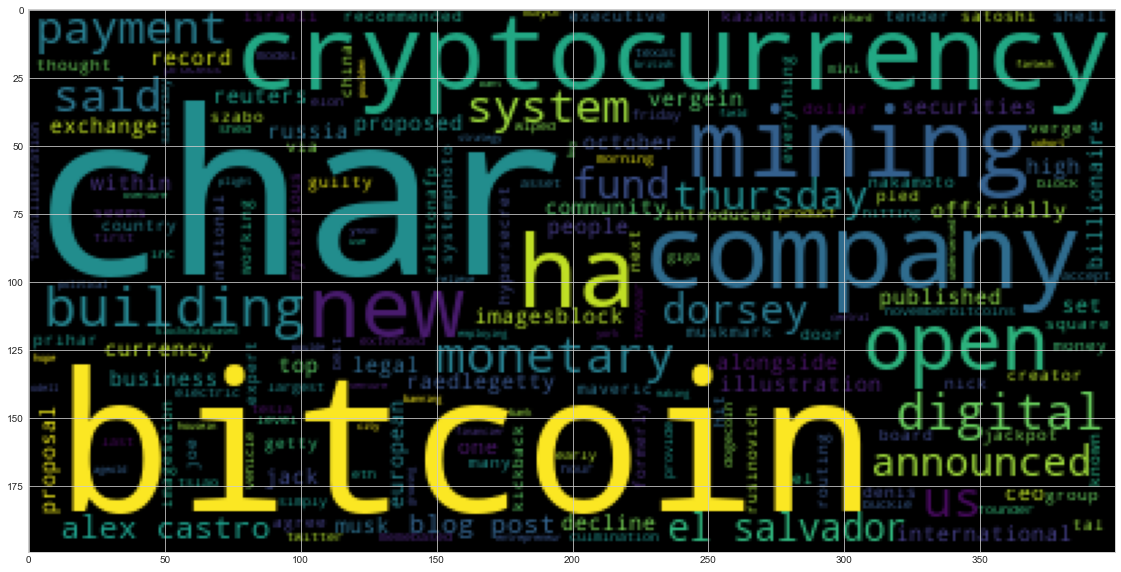

In [51]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(word_cloud("bitcoin"))
plt.imshow(bitcoin_wc);

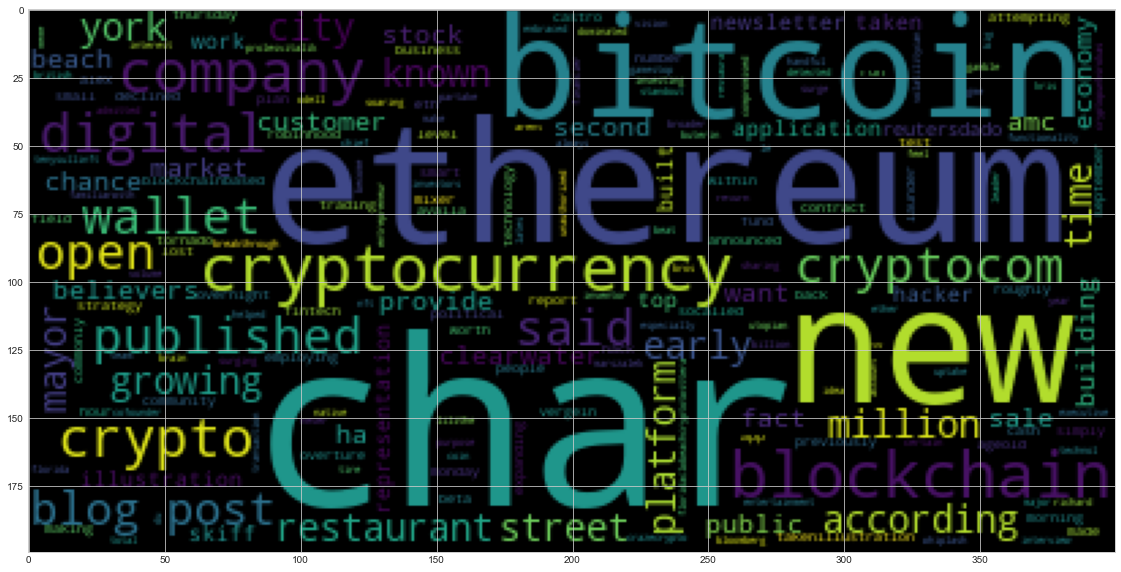

In [52]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(word_cloud("ethereum"))
plt.imshow(ethereum_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
bitcoin_texts=' '

for i in range(len(bitcoin_df)):
    t = bitcoin_df.loc[i,"text"]
    bitcoin_texts = bitcoin_texts +' '+ t

In [56]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_texts)
# Add a title to the document
entities = [ent.text for ent in bitcoin_doc.ents if ent.label_ in ['GPE', 'ORG']]

In [57]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [60]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents if ent.label_ == 'GPE' or ent.label_ == 'ORG'])

['Getty Images', 'Maveric Group', 'Kazakhstan', 'China', 'Russia', 'El Salvador', 'US', 'Verge', 'The International Monetary Fund’s', 'El', 'Illustration', 'Verge', 'ETH', 'Verge', 'the "Giga Texas', 'Fintech', 'New York City', 'house', 'Poulde', 'Russia', 'El Salvador', 'US', 'The International Monetary Fund', 'El Salvador', 'Reuters', 'Reuters', 'The U.S. Securities and Exchange Commission', 'ETF', 'Fidelitys Wise Origin Bitcoin', '+202', 'Robinhood', 'Crypto.com', 'the European Unions', 'European Securities']


---

### Ethereum NER

In [62]:
# Concatenate all of the Ethereum text together
ethereum_texts=' '

for i in range(len(ethereum_df)):
    t = ethereum_df.loc[i,"text"]
    ethereum_texts = ethereum_texts +' '+ t

In [63]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_texts)
# Add a title to the document
entities = [ent.text for ent in ethereum_doc.ents if ent.label_ in ['GPE', 'ORG']]

In [64]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [65]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents if ent.label_ == 'GPE' or ent.label_ == 'ORG'])

['ETH', 'Verge', 'Crypto.com', 'Fintech', 'New York City', 'Robinhood', 'Crypto.com', 'Ethereum', 'Crypto Street Restaurant', 'Clearwater Beach', 'Florida.@ClwBeachCrypto/Twitter', 'Clearwater Beach', 'Florida', 'Ethereum', 'AMC Entertainment', 'AMC', 'GME', 'Ethereums', 'Ethereum', 'CryptoPunksRokas Tenys', 'NFT', 'OPEN', 'OPEN', 'Bloomberg TV', 'Crypto.com', 'house', 'Poulde', 'TIME', 'Vita', 'New York City', 'Bitcoin and Ethereum', 'Coinbase Global Inc.', 'U.S.', 'Skiff', 'Skiff', 'REUTERS', 'Reuters', 'Bitcoin, Ethereum', 'DogeCoin', 'REUTERS', 'MOSCOW']


---